<a href="https://colab.research.google.com/github/tigerjk726/Bumjoong/blob/main/Typhoon_Phase5_ANN(new_data_2023_07_24)_6_countries_for_season(JJA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from statistics import mean
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

cv = LeaveOneOut()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/8.Colab Notebooks/2023.0723 Seasonal/

Mounted at /content/drive
/content/drive/My Drive/8.Colab Notebooks/2023.0723 Seasonal


In [ ]:
import os
directory = 'path'
for filename in os.listdir(directory):
    # Check if the file has a .txt extension
    if filename.endswith('.txt'):
        # Print the file name
        print(filename)

AAO_msl_Reanalysis.txt
AMO_Reanalysis.txt
AO_msl_Reanalysis.txt
EMI_Reanalysis.txt
GMT_Reanalysis.txt
NINO34_Reanalysis.txt
NINO3_Reanalysis.txt
PDO_Reanalysis.txt
PNA_Reanalysis.txt
QBO_Reanalysis.txt
NINO4_Reanalysis.txt


In [ ]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
import datetime

scaler = StandardScaler()

directory = 'path'

df_list = []

# Loop through all files in the directory
for filename in os.listdir(directory):
  if filename.endswith(".txt"):
      filepath = os.path.join(directory, filename)
      with open(filepath) as f:
          lines = [line.split() for line in f]
      data = []
      for line in lines:
          year = int(line[0])
          values = [float(x) for x in line[1:]]
          row_dict = {'year': year}
          for i, value in enumerate(values):
             month = i + 1
             month_name = pd.Timestamp(year=2000, month=month, day=1).strftime('%B').lower()
             month_name = datetime.datetime.strptime(month_name, "%B").month
             row_dict[month_name] = value
          data.append(row_dict)
    # create the DataFrame
      df = pd.DataFrame(data)
      df = df.melt(id_vars=['year'], var_name='month', value_name=filename.replace('.txt', ''))
      df = df.sort_values(['year', 'month'])
      column_name = filename.replace('.txt', '')
      # df[column_name] = scaler.fit_transform(df[column_name].values.reshape(-1, 1))
      df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
rawdata_df = pd.concat(df_list, ignore_index=True)

# Group by year and month and aggregate values
rawdata_df = rawdata_df.groupby(['year', 'month']).mean().reset_index()

# 6, 7, 8월 데이터 추출 및 년도별 평균 계산
summer_data_df = rawdata_df[rawdata_df['month'].isin([6, 7, 8])]
summer_data_df = summer_data_df.groupby(['year']).mean().reset_index()
summer_data_df = summer_data_df.drop('month', axis=1)
# 9, 10, 11월 데이터 추출 및 년도별 평균 계산
fall_data_df = rawdata_df[rawdata_df['month'].isin([9, 10, 11])]
fall_data_df = fall_data_df.groupby(['year']).mean().reset_index()
fall_data_df = fall_data_df.drop('month', axis=1)
# Fill missing values with 0 if needed
# rawdata_df = rawdata_df.fillna(0)
fall_data_df

,year,AAO_msl_Reanalysis,AMO_Reanalysis,AO_msl_Reanalysis,EMI_Reanalysis,GMT_Reanalysis,NINO34_Reanalysis,NINO3_Reanalysis,PDO_Reanalysis,PNA_Reanalysis,QBO_Reanalysis,NINO4_Reanalysis
0,1854,NaN,0.528333,NaN,-1.321000,NaN,-0.756667,-0.499333,-1.198667,NaN,NaN,-0.288333
1,1855,NaN,-0.316333,NaN,1.886000,NaN,1.650000,1.350667,-0.155667,NaN,NaN,2.201333
2,1856,NaN,1.082000,NaN,-2.596333,NaN,-2.683667,-1.634667,0.858333,NaN,NaN,-2.047333
3,1857,NaN,-0.937000,NaN,-0.559000,NaN,0.464000,0.657667,0.539000,NaN,NaN,0.517333
4,1858,NaN,-0.040000,NaN,-0.077000,NaN,0.239333,0.187333,1.448000,NaN,NaN,0.008000
...,...,...,...,...,...,...,...,...,...,...,...,...
163,2017,-0.399667,1.214333,-0.602667,0.007000,1.682667,-1.053000,-1.373333,0.153667,-0.382000,-0.911667,-0.626000
164,2018,-0.812000,-0.692333,0.066000,1.287000,1.636333,0.917000,0.662333,0.122333,-0.228000,0.406667,1.520333
165,2019,0.583333,-0.016333,-0.288000,1.767000,2.120667,0.158333,-0.324333,0.296667,-0.449333,0.819000,0.906667
166,2020,-0.656667,0.812000,0.993667,-0.408667,2.181667,-1.748000,-1.806000,-0.558000,-0.442333,1.166667,-1.636000


In [ ]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
import datetime

scaler = StandardScaler()

directory2 = 'season/JJA'

df2_list = []

# Loop through all files in the directory2
for filename in os.listdir(directory2):
  if filename.endswith(".txt"):
      filepath = os.path.join(directory2, filename)
      with open(filepath) as f:
          lines = [line.split() for line in f]
      data2 = []
      for line in lines:
          year = int(line[0])
          freq_value = float(line[1])
          row_dict = {'year': year, 'freq': freq_value}
          data2.append(row_dict)
    # create the DataFrame
      df2 = pd.DataFrame(data2)
      df2 = df2.melt(id_vars=['year'], value_name=filename.replace('.txt', ''))
      df2 = df2.sort_values(['year'])
      column_name = filename.replace('.txt', '')
      #df2[column_name] = scaler.fit_transform(df2[column_name].values.reshape(-1, 1))
      df2_list.append(df2)

# Concatenate all DataFrames into a single DataFrame
df2 = pd.concat(df2_list, ignore_index=True)


# Concatenate all DataFrames in the list into a single DataFrame
result_df = pd.concat(df2_list, ignore_index=True)

# Group by year and month and aggregate values
result_df = result_df.groupby(['year']).mean().reset_index()

result_df = result_df.rename(columns={'JJA_TC_freq_Mexico_NHC-ENP': 'JJA_TC_freq_Mexic2_NHC-ENP'})
result_df = result_df.rename(columns={'JJA_TC_landfall_intensity_Mexico_NHC-ENP': 'JJA_TC_landfall_intensity_Mexico2_NHC-ENP'})
result_df = result_df.rename(columns={'JJA_TC_freq_US_NHC-ENP': 'JJA_TC_freq_US2_NHC-ENP'})
result_df = result_df.rename(columns={'JJA_TC_landfall_intensity_US_NHC-ENP': 'JJA_TC_landfall_intensity_US2_NHC-ENP'})
result_df.columns = map(str.lower, result_df.columns)
# Fill missing values with 0 if neederesult
result_df = result_df.clip(lower=0)
pd.options.display.max_columns = None
result_df

<ipython-input-5-a7a8f96e711b>:40: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_df = result_df.groupby(['year']).mean().reset_index()


,year,jja_tc_freq_sri_jtwc-nio,jja_tc_landfall_intensity_sri_jtwc-nio,jja_tc_freq_us2_nhc-enp,jja_tc_freq_india_jtwc-nio,jja_tc_landfall_intensity_india_jtwc-nio,jja_tc_freq_pakistan_jtwc-nio,jja_tc_landfall_intensity_pakistan_jtwc-nio,jja_tc_freq_bangla_jtwc-nio,jja_tc_landfall_intensity_bangla_jtwc-nio,jja_tc_freq_myanmar_jtwc-nio,jja_tc_landfall_intensity_myanmar_jtwc-nio,jja_tc_freq_madagascar_jtwc-sh,jja_tc_landfall_intensity_madagascar_jtwc-sh,jja_tc_freq_austrailia_jtwc-sh,jja_tc_landfall_intensity_austrailia_jtwc-sh,jja_tc_freq_korea_jtwc-wnp,jja_tc_landfall_intensity_korea_jtwc-wnp,jja_tc_freq_japan_jtwc-wnp,jja_tc_landfall_intensity_japan_jtwc-wnp,jja_tc_freq_taiwan_jtwc-wnp,jja_tc_landfall_intensity_taiwan_jtwc-wnp,jja_tc_freq_china_jtwc-wnp,jja_tc_landfall_intensity_china_jtwc-wnp,jja_tc_freq_vietnam_jtwc-wnp,jja_tc_landfall_intensity_vietnam_jtwc-wnp,jja_tc_freq_phili_jtwc-wnp,jja_tc_landfall_intensity_phili_jtwc-wnp,jja_tc_landfall_intensity_us2_nhc-enp,jja_tc_freq_mexic2_nhc-enp,jja_tc_landfall_intensity_mexico2_nhc-enp,jja_tc_freq_us_nhc-nat,jja_tc_landfall_intensity_us_nhc-nat,jja_tc_freq_mexico_nhc-nat,jja_tc_landfall_intensity_mexico_nhc-nat,jja_tc_freq_carribean_nhc-nat,jja_tc_landfall_intensity_carribean_nhc-nat
0,1959,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,66.7,2.0,90.0,3.0,115.0,3.0,106.4,0.0,0.0,2.0,52.5,0.0,2.0,45.0,4.0,29.2,1.0,35.0,1.0,39.2
1,1960,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,52.9,6.0,72.6,5.0,78.3,8.0,70.1,1.0,70.0,2.0,71.7,0.0,5.0,63.0,2.0,32.9,2.0,47.5,0.0,0.0
2,1961,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,28.6,4.0,50.6,4.0,77.9,5.0,51.8,1.0,61.7,4.0,72.5,0.0,2.0,60.0,0.0,0.0,1.0,75.0,0.0,0.0
3,1962,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,60.0,6.0,70.7,3.0,93.9,6.0,82.6,1.0,51.7,3.0,54.4,0.0,1.0,75.0,2.0,22.8,0.0,0.0,1.0,25.0
4,1963,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,69.6,6.0,65.7,2.0,75.0,5.0,82.2,2.0,55.0,4.0,65.4,0.0,1.0,75.0,1.0,30.0,0.0,0.0,1.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,57.5,2.0,67.9,5.0,45.5,7.0,49.6,3.0,41.9,5.0,28.5,0.0,4.0,30.0,3.0,55.0,3.0,36.4,3.0,36.7
59,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,60.0,8.0,67.7,5.0,44.3,10.0,39.4,3.0,35.8,3.0,29.7,0.0,3.0,43.1,1.0,25.0,0.0,0.0,1.0,35.0
60,2019,0.0,0.0,0.0,1.0,52.5,1.0,96.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,49.4,3.0,51.7,4.0,59.0,6.0,52.9,3.0,35.8,4.0,29.6,0.0,1.0,30.0,1.0,25.0,0.0,0.0,1.0,55.8
61,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,51.1,1.0,36.7,3.0,35.8,6.0,51.7,2.0,24.6,5.0,16.3,0.0,4.0,44.4,8.0,47.5,4.0,44.8,5.0,39.0


In [ ]:
column_titles = list(result_df.columns)
column_titles.remove('year')
column_titles.sort()
column_titles

['jja_tc_freq_austrailia_jtwc-sh',
 'jja_tc_freq_bangla_jtwc-nio',
 'jja_tc_freq_carribean_nhc-nat',
 'jja_tc_freq_china_jtwc-wnp',
 'jja_tc_freq_india_jtwc-nio',
 'jja_tc_freq_japan_jtwc-wnp',
 'jja_tc_freq_korea_jtwc-wnp',
 'jja_tc_freq_madagascar_jtwc-sh',
 'jja_tc_freq_mexic2_nhc-enp',
 'jja_tc_freq_mexico_nhc-nat',
 'jja_tc_freq_myanmar_jtwc-nio',
 'jja_tc_freq_pakistan_jtwc-nio',
 'jja_tc_freq_phili_jtwc-wnp',
 'jja_tc_freq_sri_jtwc-nio',
 'jja_tc_freq_taiwan_jtwc-wnp',
 'jja_tc_freq_us2_nhc-enp',
 'jja_tc_freq_us_nhc-nat',
 'jja_tc_freq_vietnam_jtwc-wnp',
 'jja_tc_landfall_intensity_austrailia_jtwc-sh',
 'jja_tc_landfall_intensity_bangla_jtwc-nio',
 'jja_tc_landfall_intensity_carribean_nhc-nat',
 'jja_tc_landfall_intensity_china_jtwc-wnp',
 'jja_tc_landfall_intensity_india_jtwc-nio',
 'jja_tc_landfall_intensity_japan_jtwc-wnp',
 'jja_tc_landfall_intensity_korea_jtwc-wnp',
 'jja_tc_landfall_intensity_madagascar_jtwc-sh',
 'jja_tc_landfall_intensity_mexico2_nhc-enp',
 'jja_tc_land

In [ ]:
country_codes = {
    'austrailia': 0,
    'bangla': 1,
    'carribean': 2,
    'china': 3,
    'india': 4,
    'japan': 5,
    'korea': 6,
    'madagascar': 7,
    'mexic2': 8,
    'mexico': 9,
    'myanmar': 10,
    'phili': 11,
    'pakistan': 12,
    'sri': 13,
    'taiwan': 14,
    'us2': 15,
    'us': 16,
    'vietnam': 17,
}


In [ ]:
result_dfs = []

for col in column_titles:

    for key in country_codes.keys():
        if key in col.lower():
            country = country_codes[key]
            break
    else:
        country = None

    # Add the 'country' column to result_df
    result_df['country'] = country
    result_df['name'] = key

    # Check if the selected column name contains 'freq' or 'intensity', and replace the entire column name with either 'freq' or 'intensity' accordingly
    if 'freq' in col.lower():
        new_column_name = 'freq'
    elif 'intensity' in col.lower():
        new_column_name = 'intensity'
    else:
        new_column_name = col

    # Get the years without nan values for the selected country
    years = result_df[result_df[col].notna()]['year'].unique()

    # Filter dataframe A for the selected country and years
    x = summer_data_df[summer_data_df['year'].isin(years)]

    # Filter dataframe B for the selected country and years, and rename the selected column
    y = result_df[['year', 'country', 'name', col]][result_df[col].notna() & result_df['year'].isin(years)].rename(columns={col: new_column_name})

    xy = pd.merge(x, y, on=['year'])
    result_dfs.append(xy)

alldfs = pd.concat(result_dfs, ignore_index=True)
alldfs

# one-hot encoding using pandas.get_dummies() method
one_hot = pd.get_dummies(alldfs['country'])

# concatenate the one-hot encoded dataframe with the original dataframe
alldfs = pd.concat([alldfs, one_hot], axis=1)

# drop the original 'country' column
cols = list(alldfs.columns)
cols.append(cols.pop(cols.index('freq')))
alldfs = alldfs[cols]
cols = list(alldfs.columns)
cols.append(cols.pop(cols.index('intensity')))
alldfs = alldfs[cols]
cols = list(alldfs.columns)
cols.append(cols.pop(cols.index('country')))
alldfs = alldfs[cols]
cols = list(alldfs.columns)
cols.append(cols.pop(cols.index('name')))
alldfs = alldfs[cols]
alldfs

,year,AAO_msl_Reanalysis,AMO_Reanalysis,AO_msl_Reanalysis,EMI_Reanalysis,GMT_Reanalysis,NINO34_Reanalysis,NINO3_Reanalysis,PDO_Reanalysis,PNA_Reanalysis,QBO_Reanalysis,NINO4_Reanalysis,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,freq,intensity,country,name
0,1991,0.353000,-1.593000,0.372667,0.950333,0.523667,1.016333,0.991667,-0.843000,-0.153000,-0.719000,1.134000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,0,austrailia
1,1992,0.144333,-1.914333,0.531000,0.913000,-0.654667,0.670667,0.434333,1.355333,0.482333,-0.158333,0.904667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,0,austrailia
2,1993,-1.565000,-1.840667,-0.612333,0.329000,-0.485667,0.579333,0.628667,1.937333,-0.037333,0.363667,0.552333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,0,austrailia
3,1994,0.506000,-1.660667,1.163333,1.583667,-0.314333,0.725333,-0.019667,-0.089333,0.255667,-1.395000,1.340667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,0,austrailia
4,1995,1.542333,1.066000,0.118333,0.579667,0.386000,-0.219667,-0.649000,1.036667,0.350667,1.283333,0.409667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,0,austrailia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,2017,-0.791000,0.626333,0.699667,0.054333,1.422333,-0.048000,-0.310333,0.364000,0.585000,-0.463000,0.210667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,41.9,17,vietnam
2016,2018,0.179667,-0.860667,0.627333,0.827000,1.339000,0.060000,-0.078333,0.148333,-0.111000,-1.311667,0.617667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,35.8,17,vietnam
2017,2019,-0.382667,-0.014667,-0.810000,1.490333,1.778000,0.092667,-0.397333,0.929667,0.148333,1.271333,0.919333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,35.8,17,vietnam
2018,2020,0.031333,0.874000,-0.493667,0.161333,1.659000,-0.749667,-1.081000,-0.388000,-0.167000,1.035333,-0.337000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,24.6,17,vietnam


In [ ]:
freqdf = alldfs.drop(columns=['intensity'])
freqdf = freqdf.dropna().reset_index(drop=True)
freqdf

,year,AAO_msl_Reanalysis,AMO_Reanalysis,AO_msl_Reanalysis,EMI_Reanalysis,GMT_Reanalysis,NINO34_Reanalysis,NINO3_Reanalysis,PDO_Reanalysis,PNA_Reanalysis,QBO_Reanalysis,NINO4_Reanalysis,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,freq,country,name
0,1991,0.353000,-1.593000,0.372667,0.950333,0.523667,1.016333,0.991667,-0.843000,-0.153000,-0.719000,1.134000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,austrailia
1,1992,0.144333,-1.914333,0.531000,0.913000,-0.654667,0.670667,0.434333,1.355333,0.482333,-0.158333,0.904667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,austrailia
2,1993,-1.565000,-1.840667,-0.612333,0.329000,-0.485667,0.579333,0.628667,1.937333,-0.037333,0.363667,0.552333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,austrailia
3,1994,0.506000,-1.660667,1.163333,1.583667,-0.314333,0.725333,-0.019667,-0.089333,0.255667,-1.395000,1.340667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,austrailia
4,1995,1.542333,1.066000,0.118333,0.579667,0.386000,-0.219667,-0.649000,1.036667,0.350667,1.283333,0.409667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,austrailia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,2017,-0.791000,0.626333,0.699667,0.054333,1.422333,-0.048000,-0.310333,0.364000,0.585000,-0.463000,0.210667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.0,17,vietnam
1006,2018,0.179667,-0.860667,0.627333,0.827000,1.339000,0.060000,-0.078333,0.148333,-0.111000,-1.311667,0.617667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.0,17,vietnam
1007,2019,-0.382667,-0.014667,-0.810000,1.490333,1.778000,0.092667,-0.397333,0.929667,0.148333,1.271333,0.919333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.0,17,vietnam
1008,2020,0.031333,0.874000,-0.493667,0.161333,1.659000,-0.749667,-1.081000,-0.388000,-0.167000,1.035333,-0.337000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.0,17,vietnam


In [ ]:
intendf = alldfs.drop(columns=['freq'])
intendf = intendf.dropna().reset_index(drop=True)
intendf

,year,AAO_msl_Reanalysis,AMO_Reanalysis,AO_msl_Reanalysis,EMI_Reanalysis,GMT_Reanalysis,NINO34_Reanalysis,NINO3_Reanalysis,PDO_Reanalysis,PNA_Reanalysis,QBO_Reanalysis,NINO4_Reanalysis,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,intensity,country,name
0,1991,0.353000,-1.593000,0.372667,0.950333,0.523667,1.016333,0.991667,-0.843000,-0.153000,-0.719000,1.134000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,austrailia
1,1992,0.144333,-1.914333,0.531000,0.913000,-0.654667,0.670667,0.434333,1.355333,0.482333,-0.158333,0.904667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,austrailia
2,1993,-1.565000,-1.840667,-0.612333,0.329000,-0.485667,0.579333,0.628667,1.937333,-0.037333,0.363667,0.552333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,austrailia
3,1994,0.506000,-1.660667,1.163333,1.583667,-0.314333,0.725333,-0.019667,-0.089333,0.255667,-1.395000,1.340667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,austrailia
4,1995,1.542333,1.066000,0.118333,0.579667,0.386000,-0.219667,-0.649000,1.036667,0.350667,1.283333,0.409667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,austrailia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,2017,-0.791000,0.626333,0.699667,0.054333,1.422333,-0.048000,-0.310333,0.364000,0.585000,-0.463000,0.210667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,41.9,17,vietnam
1006,2018,0.179667,-0.860667,0.627333,0.827000,1.339000,0.060000,-0.078333,0.148333,-0.111000,-1.311667,0.617667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,35.8,17,vietnam
1007,2019,-0.382667,-0.014667,-0.810000,1.490333,1.778000,0.092667,-0.397333,0.929667,0.148333,1.271333,0.919333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,35.8,17,vietnam
1008,2020,0.031333,0.874000,-0.493667,0.161333,1.659000,-0.749667,-1.081000,-0.388000,-0.167000,1.035333,-0.337000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24.6,17,vietnam


In [ ]:
# ANN leaveoneyearout X

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the neural network model for predicting y1
model_1 = Sequential()
model_1.add(Dense(64, input_dim=29, activation="relu"))
model_1.add(Dense(32, activation="relu"))
model_1.add(Dense(1, activation="linear"))
model_1.compile(loss="mean_squared_error", optimizer="adam")
# Initialize the lists to store the predictions and actual values for y1 and y2

y1_preds = []
y1_actuals = []
y1_test_country = []
y1_test_month = []
y1_test_year = []

# examption : 'myanmar': 10, 'pakistan': 12, 'sri': 13, 'u2': 15,'bangla' : 1
freqdf = freqdf[~freqdf['country'].isin([0,1,2,4,7,8,9,10,12,13,15,17])].reset_index(drop=True)


# Split the data into training and test sets
freqdf_x1_train = freqdf.iloc[:,1:30]
freqdf_x1_test = freqdf.iloc[:,1:30]
freqdf_y1_train = freqdf.iloc[:,[0, 1, 32, 30]]
freqdf_y1_test = freqdf.iloc[:,[0, 1, 32, 30]]

# Train the model on the entire training set
model_1.fit(freqdf_x1_train, freqdf_y1_train.iloc[:,3], epochs=100, batch_size=30, verbose=0)

# Predict the output for the test set
y1_pred = model_1.predict(freqdf_x1_test)

# Convert predictions to DataFrame and concatenate with country and month columns
y1_pred_df = pd.DataFrame({"year": freqdf_y1_test.iloc[:,0].values, "month": freqdf_y1_test.iloc[:,1].values, "country": freqdf_y1_test.iloc[:,2].values, "y1_pred": np.squeeze(y1_pred),"y1_actual": freqdf_y1_test.iloc[:,3].values})
y1_pred_df = y1_pred_df[['year', 'month', 'country', 'y1_pred', 'y1_actual']]

# Save predictions to CSV file
y1_pred_df.to_csv('y_pred_ANN_freq_20230725_JJA.csv', index=False)

import pickle

#Save
with open('model_freq_20230725_JJA.pkl', 'wb') as f:
    pickle.dump(model_1, f)


12/12 [==============================] - 0s 2ms/step


RMSE for y1: 0.8341438976195746
Correlation for y1: 0.9195915909523146


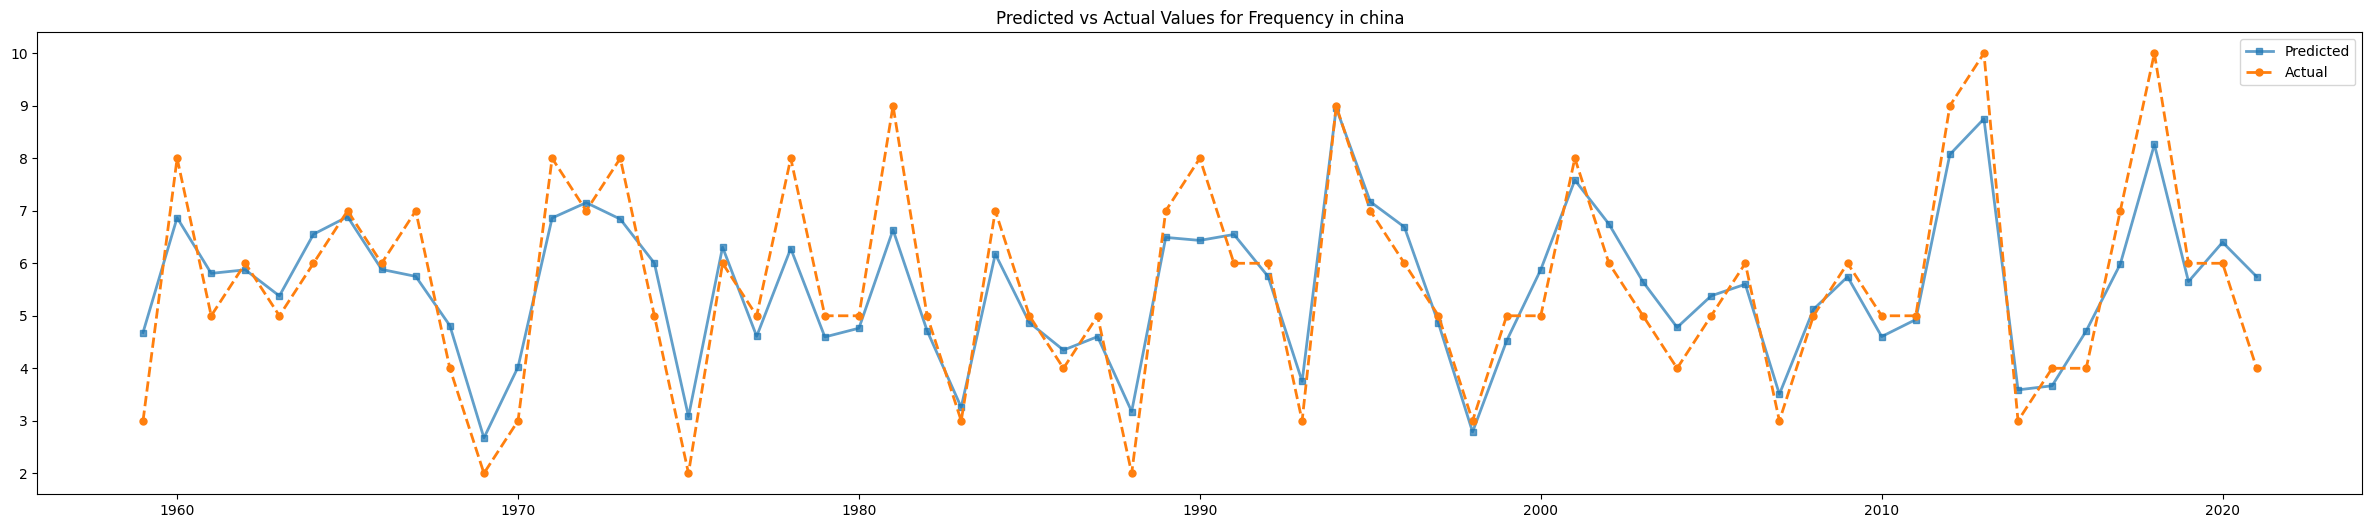

RMSE for y1: 0.9047176013567976
Correlation for y1: 0.8768532319115999


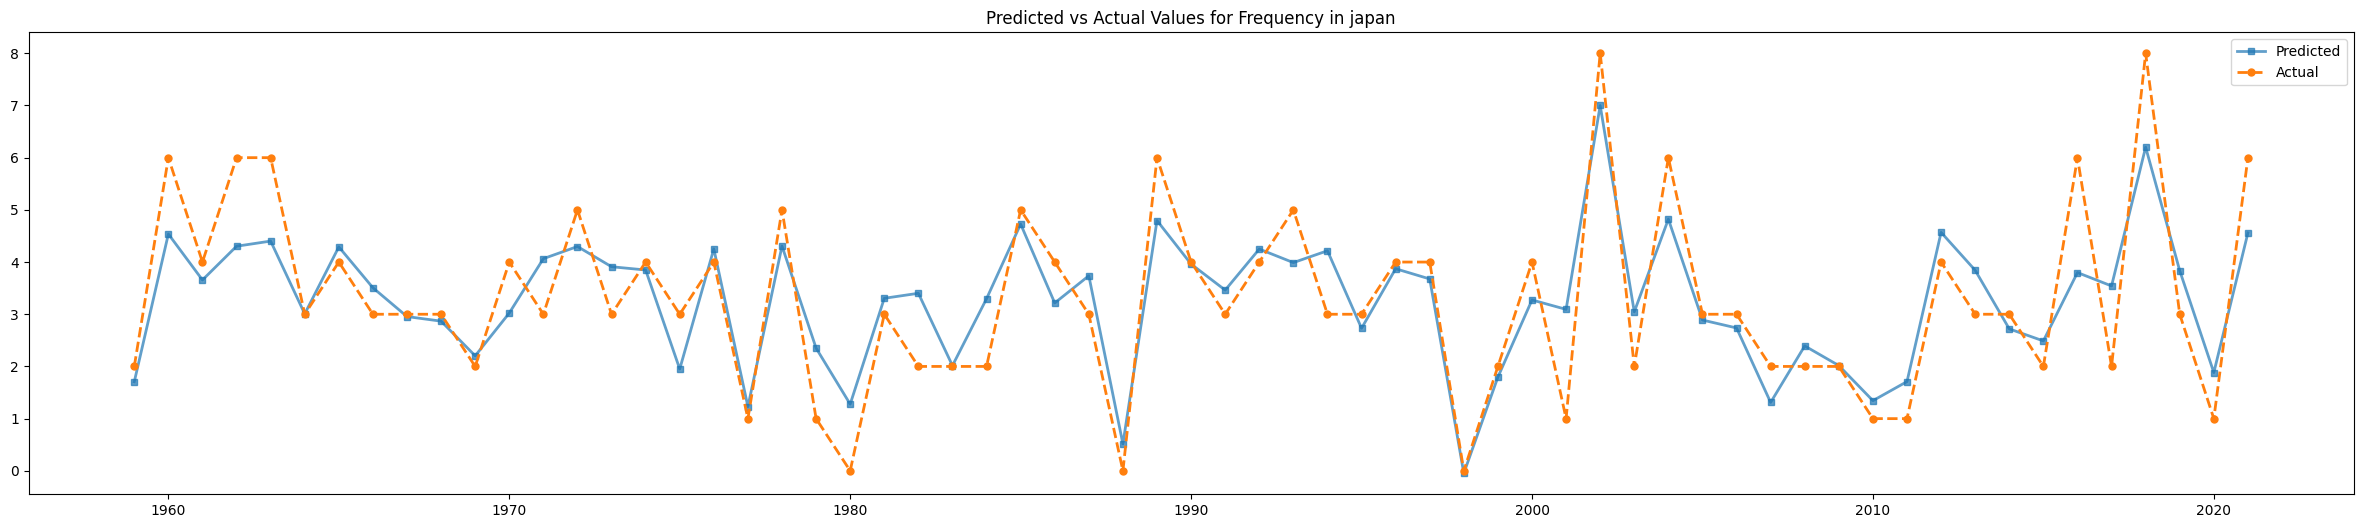

RMSE for y1: 0.6445209041841928
Correlation for y1: 0.8838238655340953


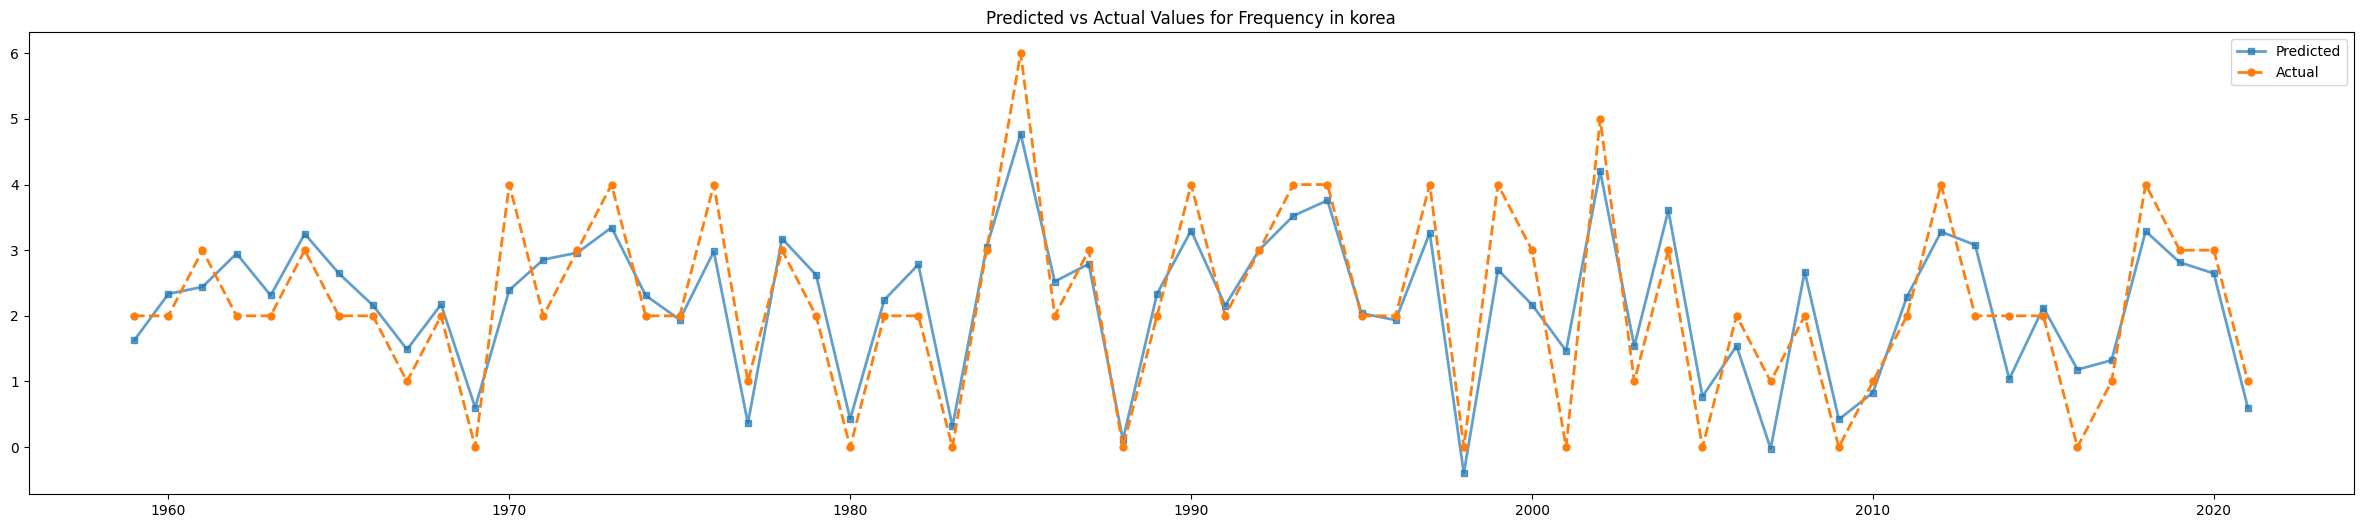

RMSE for y1: 0.980056049773518
Correlation for y1: 0.8420856157690684


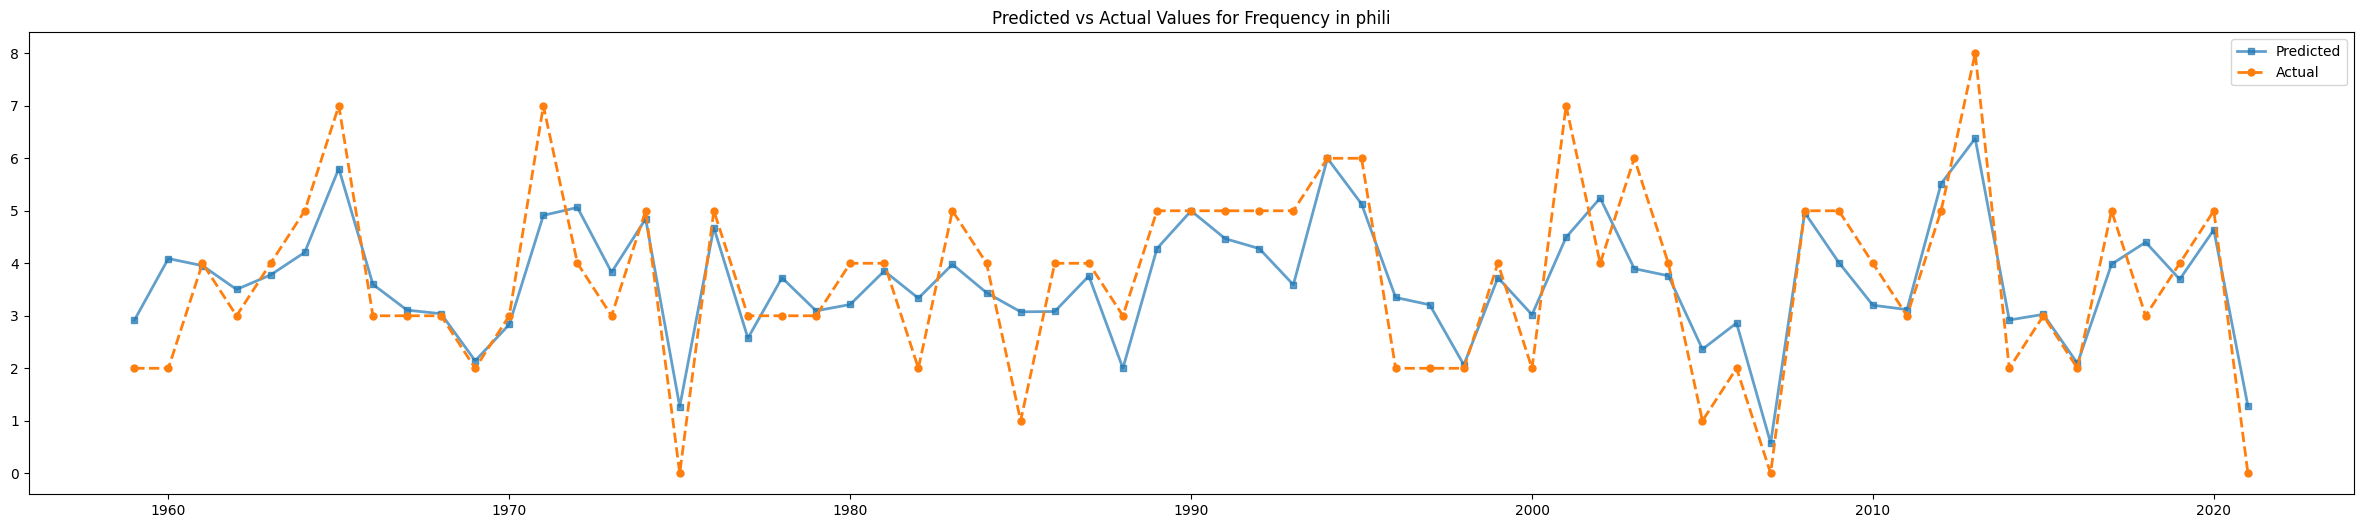

RMSE for y1: 0.8078153979294063
Correlation for y1: 0.8218517392476522


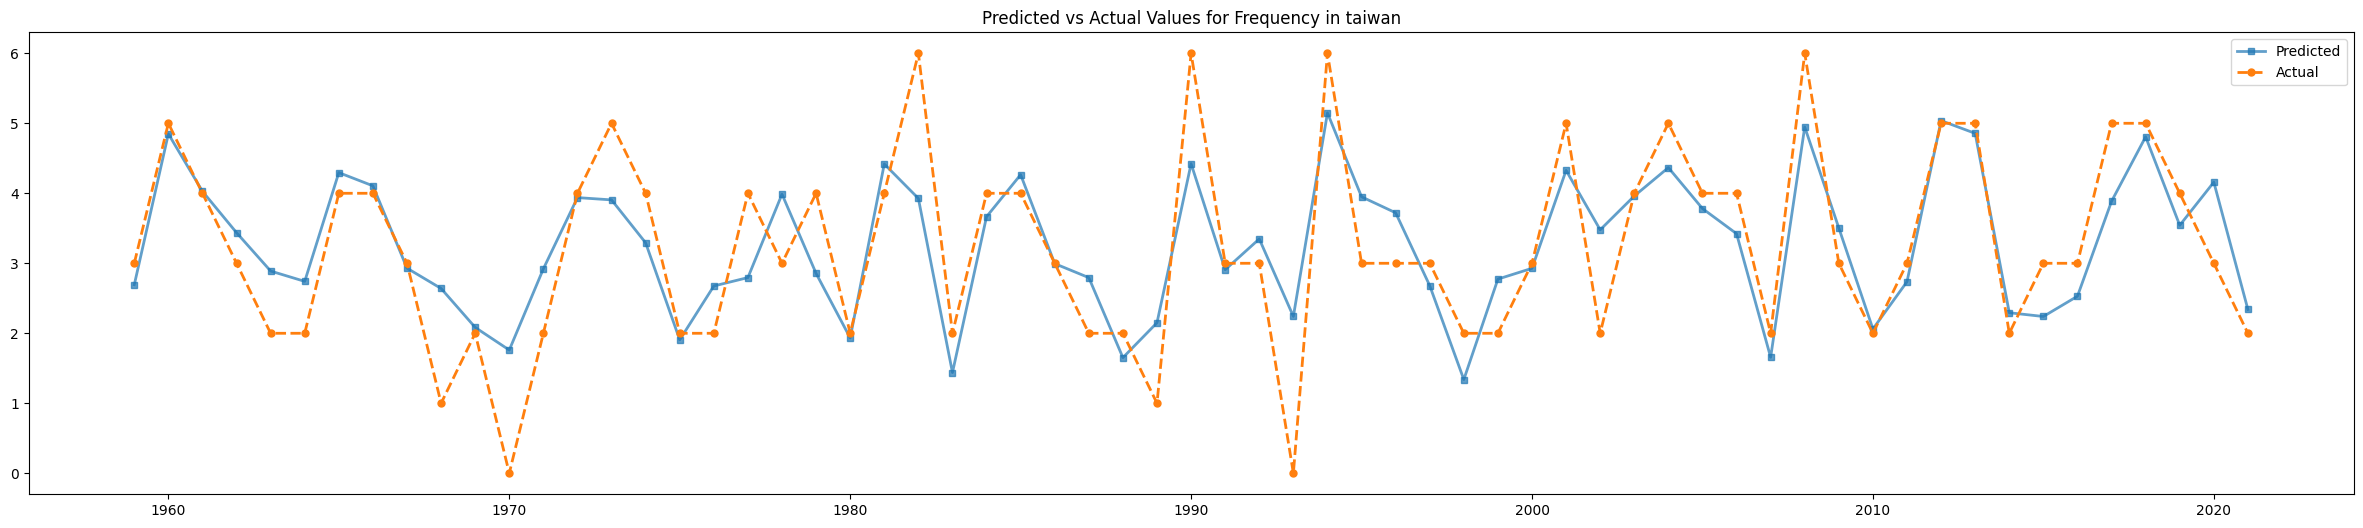

RMSE for y1: 0.9393464210686017
Correlation for y1: 0.7991774698551671


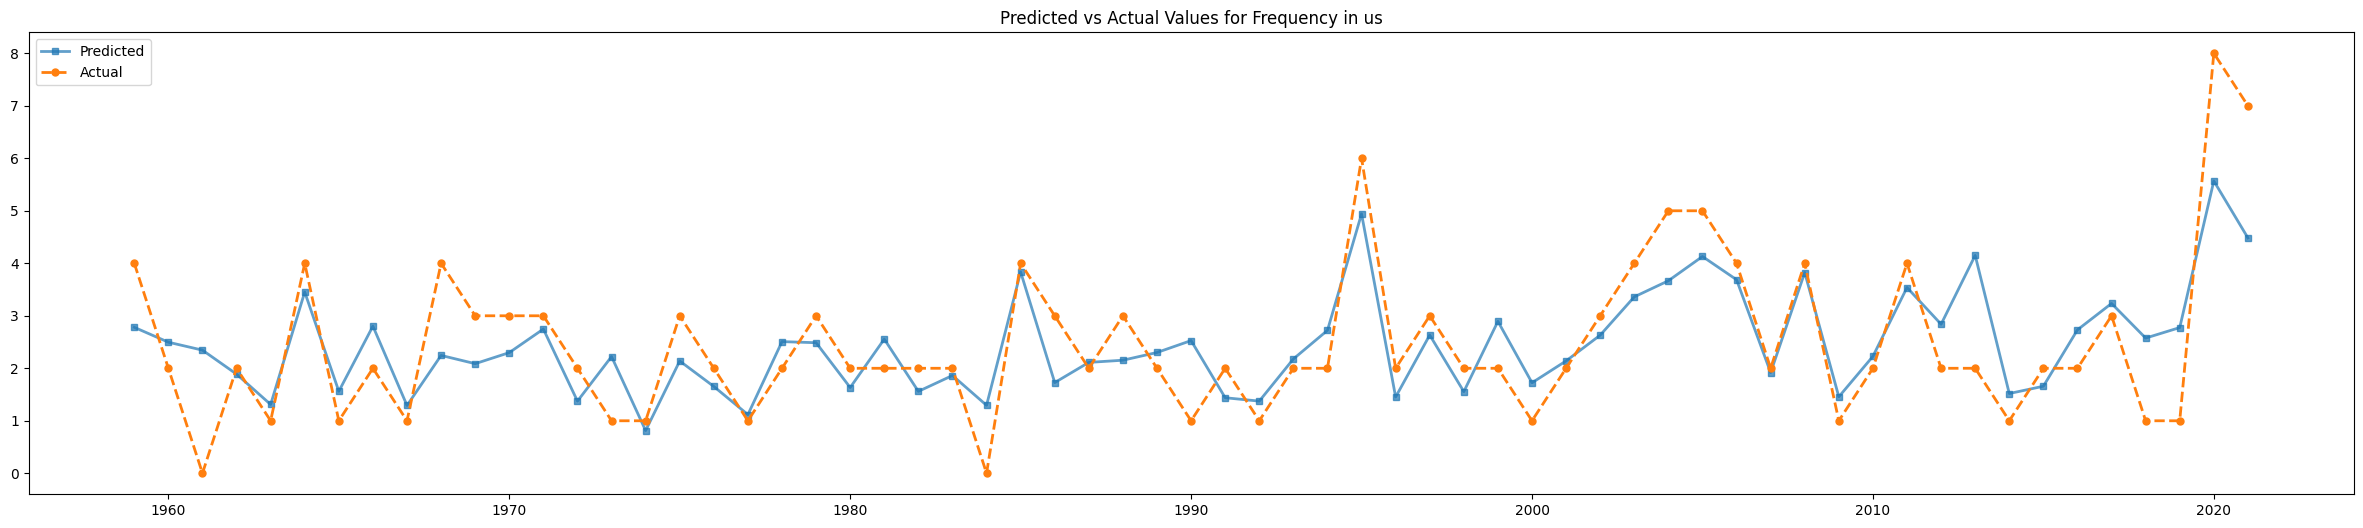

In [ ]:

# Load the predictions from the CSV file
y1_pred_df = pd.read_csv('y_pred_ANN_freq_20230725_JJA.csv')

# Plot the predictions and actual values for y1 by country and month
countries = y1_pred_df['country'].unique()

for country in countries:
    country_pred_df = y1_pred_df[y1_pred_df['country'] == country]
    country_pred_df = country_pred_df.groupby('year').agg({'y1_actual': 'sum', 'y1_pred': 'sum'}).reset_index()
    rmse_1 = np.sqrt(mean_squared_error(country_pred_df['y1_actual'], country_pred_df['y1_pred']))
    print("RMSE for y1:", rmse_1)
    corr = country_pred_df['y1_actual'].corr(country_pred_df['y1_pred'])
    print("Correlation for y1:", corr)
    plt.figure(figsize=(30, 6))
    plt.plot(country_pred_df['year'], country_pred_df['y1_pred'], label="Predicted", linewidth=2, linestyle='-', marker='s', markersize=5, alpha=0.7)
    plt.plot(country_pred_df['year'], country_pred_df['y1_actual'], label="Actual", linewidth=2, linestyle='--', marker='o', markersize=5, alpha=1)
    plt.title(f"Predicted vs Actual Values for Frequency in {country}")
    plt.legend()
    plt.show()

In [ ]:
# ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import pickle


# Define the neural network model for predicting y2
model_2 = Sequential()
model_2.add(Dense(64, input_dim=29, activation="relu"))
model_2.add(Dense(32, activation="relu"))
model_2.add(Dense(1, activation="linear"))
model_2.compile(loss="mean_squared_error", optimizer="adam")
# Initialize the lists to store the predictions and actual values for y2 and y2

y2_preds = []
y2_actuals = []
y2_test_country = []
y2_test_month = []
y2_test_year = []

# examption : 'myanmar': 10, 'pakistan': 12, 'sri': 13, 'u2': 15,'bangla' : 1
intendf = intendf[~intendf['country'].isin([0,1,2,4,7,8,9,10,12,13,15,17])].reset_index(drop=True)


# Split the data into training and test sets
intendf_x2_train = intendf.iloc[:,1:30]
intendf_x2_test = intendf.iloc[:,1:30]
intendf_y2_train = intendf.iloc[:,[0, 1, 32, 30]]
intendf_y2_test = intendf.iloc[:,[0, 1, 32, 30]]

# Train the model on the entire training set
model_2.fit(intendf_x2_train, intendf_y2_train.iloc[:,3], epochs=100, batch_size=30, verbose=0)

# Predict the output for the test set
y2_pred = model_2.predict(intendf_x2_test)

# Convert predictions to DataFrame and concatenate with country and month columns
y2_pred_df = pd.DataFrame({"year": intendf_y2_test.iloc[:,0].values, "month": intendf_y2_test.iloc[:,1].values, "country": intendf_y2_test.iloc[:,2].values, "y2_pred": np.squeeze(y2_pred),"y2_actual": intendf_y2_test.iloc[:,3].values})
y2_pred_df = y2_pred_df[['year', 'month', 'country', 'y2_pred', 'y2_actual']]

# Save predictions to CSV file
y2_pred_df.to_csv('y_pred_ANN_inten_20230725_JJA.csv', index=False)

import pickle

# 모델 저장
with open('model_inten_20230725_JJA.pkl', 'wb') as f:
    pickle.dump(model_2, f)


12/12 [==============================] - 0s 2ms/step


RMSE for y2: 11.46584662746327
Correlation for y2: 0.5505826064645958


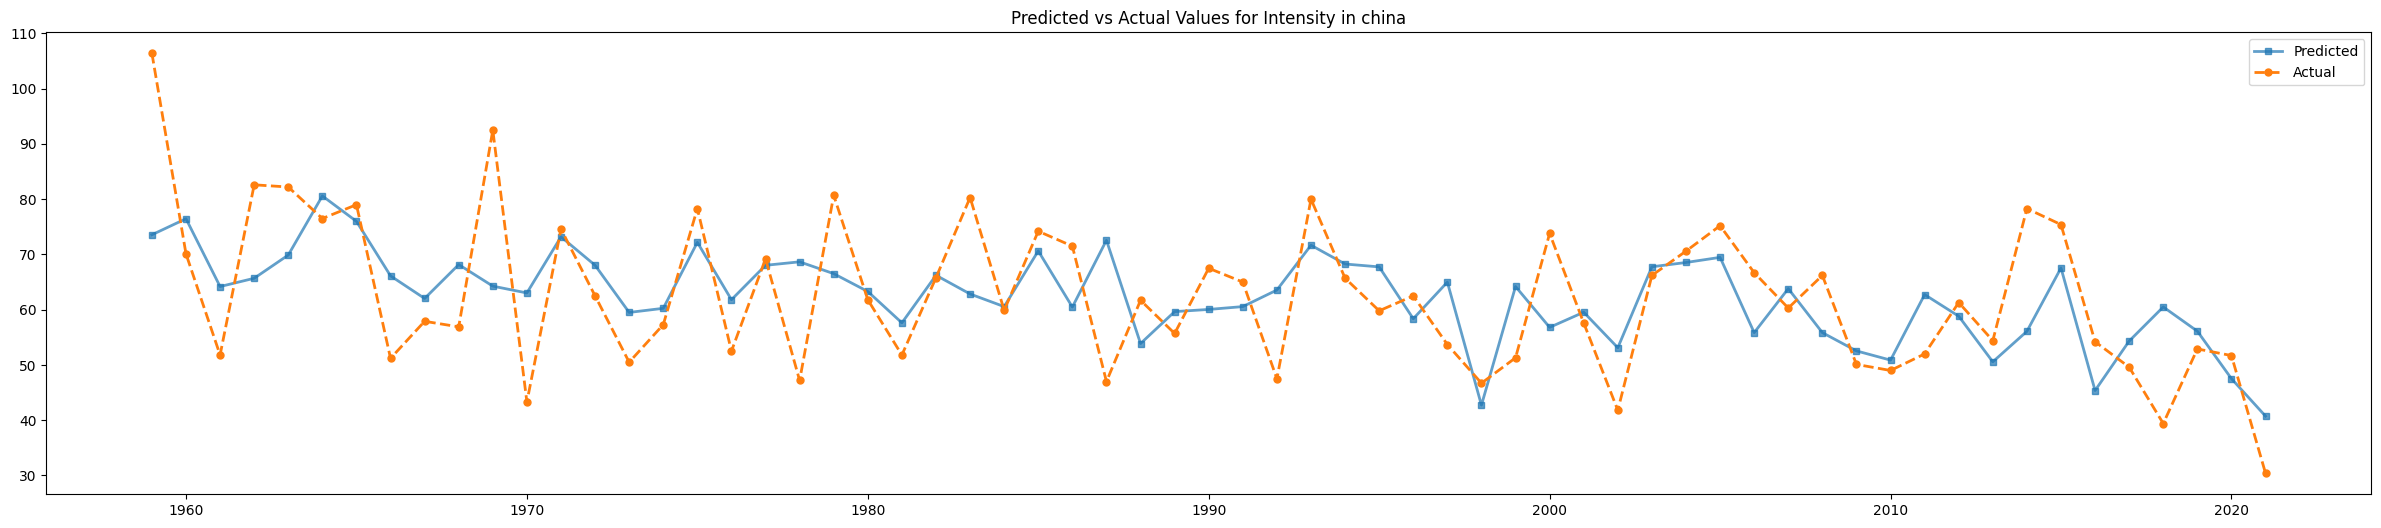

RMSE for y2: 16.232134683221318
Correlation for y2: 0.6947932376960849


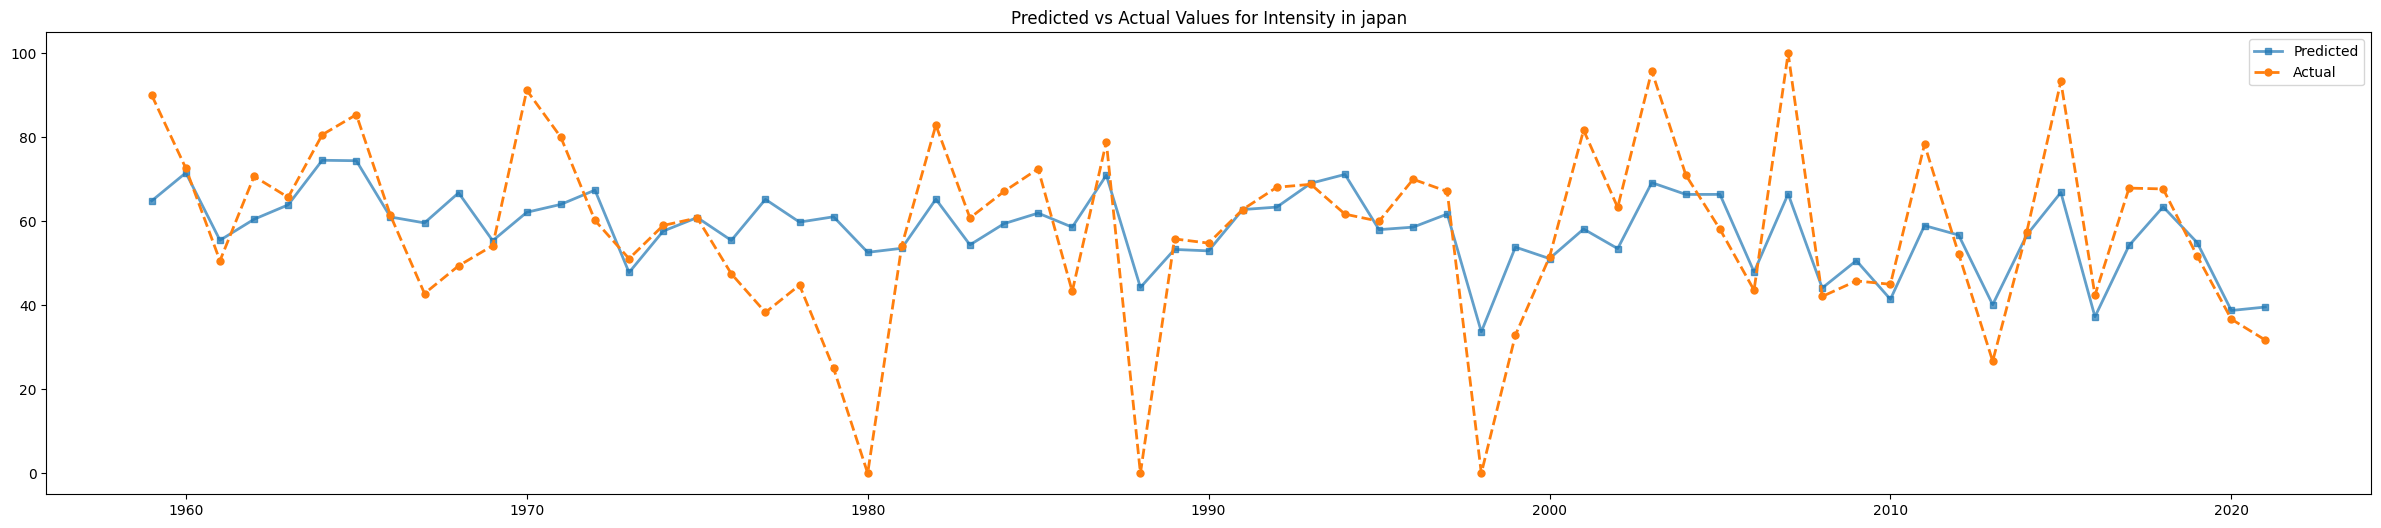

RMSE for y2: 18.82307048213102
Correlation for y2: 0.6139774473450613


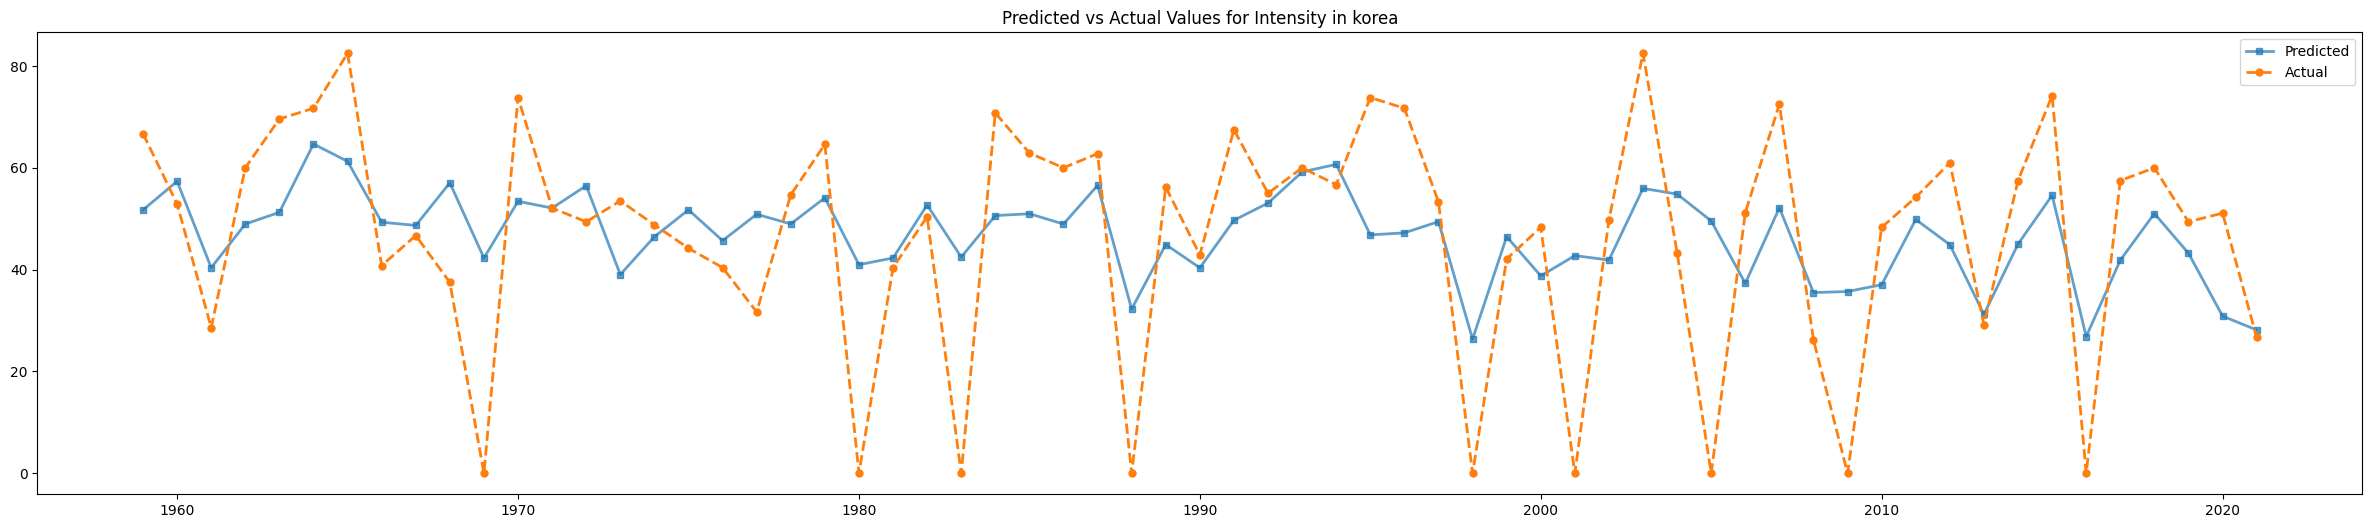

RMSE for y2: 17.965269966323056
Correlation for y2: 0.5423351866787235


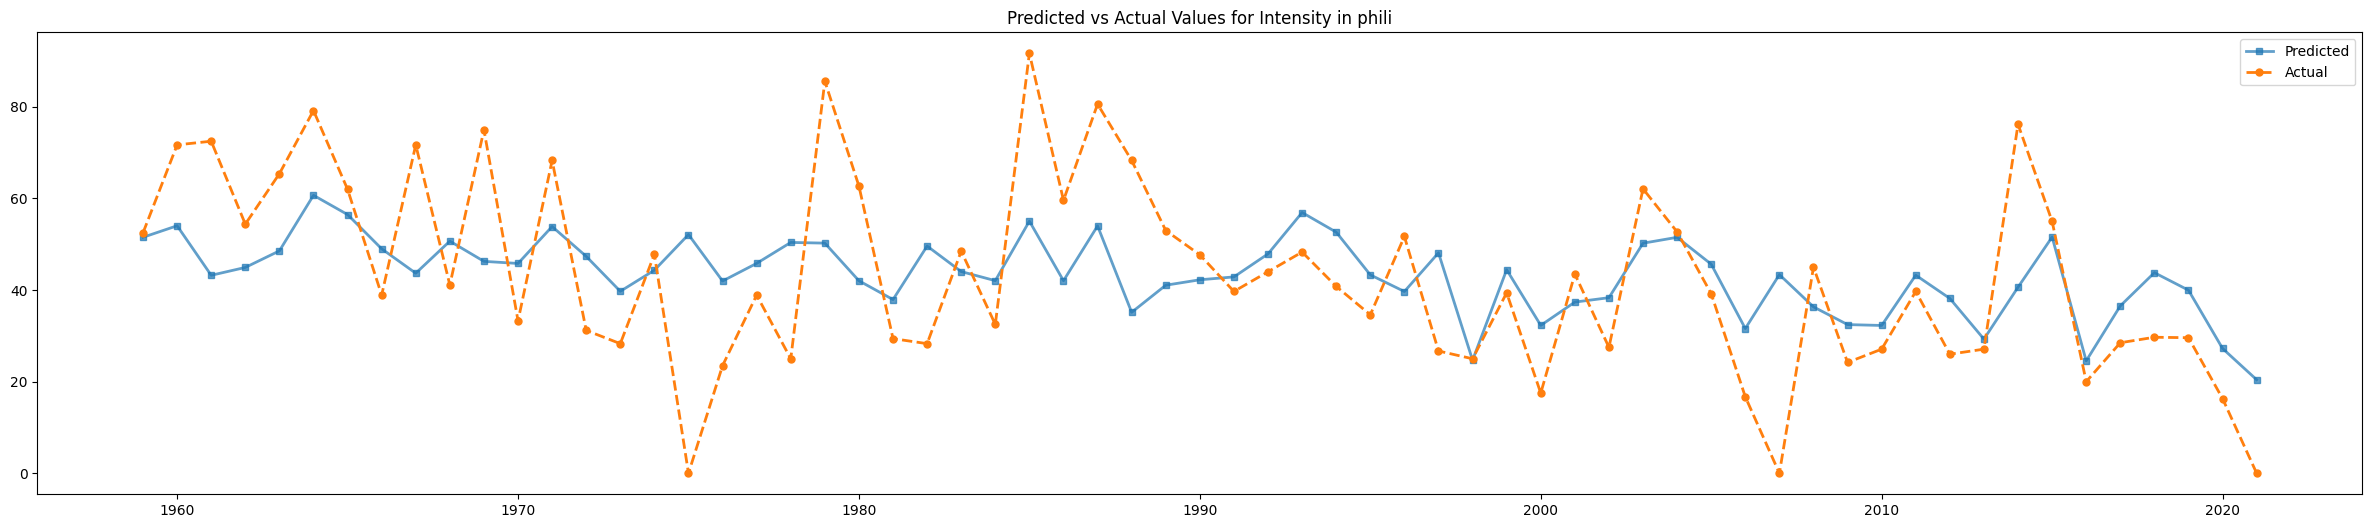

RMSE for y2: 20.99605817804004
Correlation for y2: 0.4483348065270248


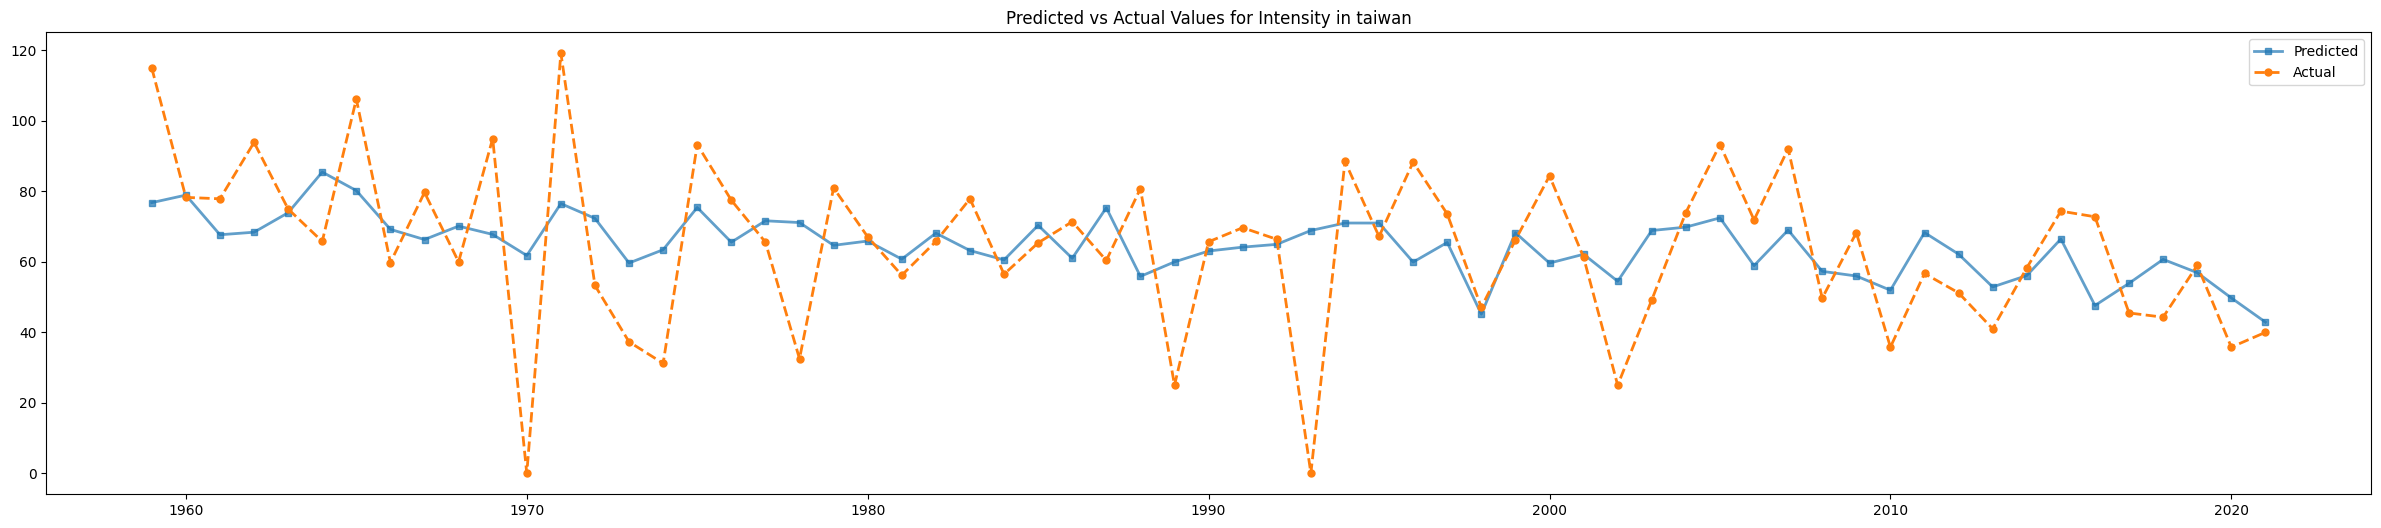

RMSE for y2: 19.638088768375397
Correlation for y2: 0.22022616112707952


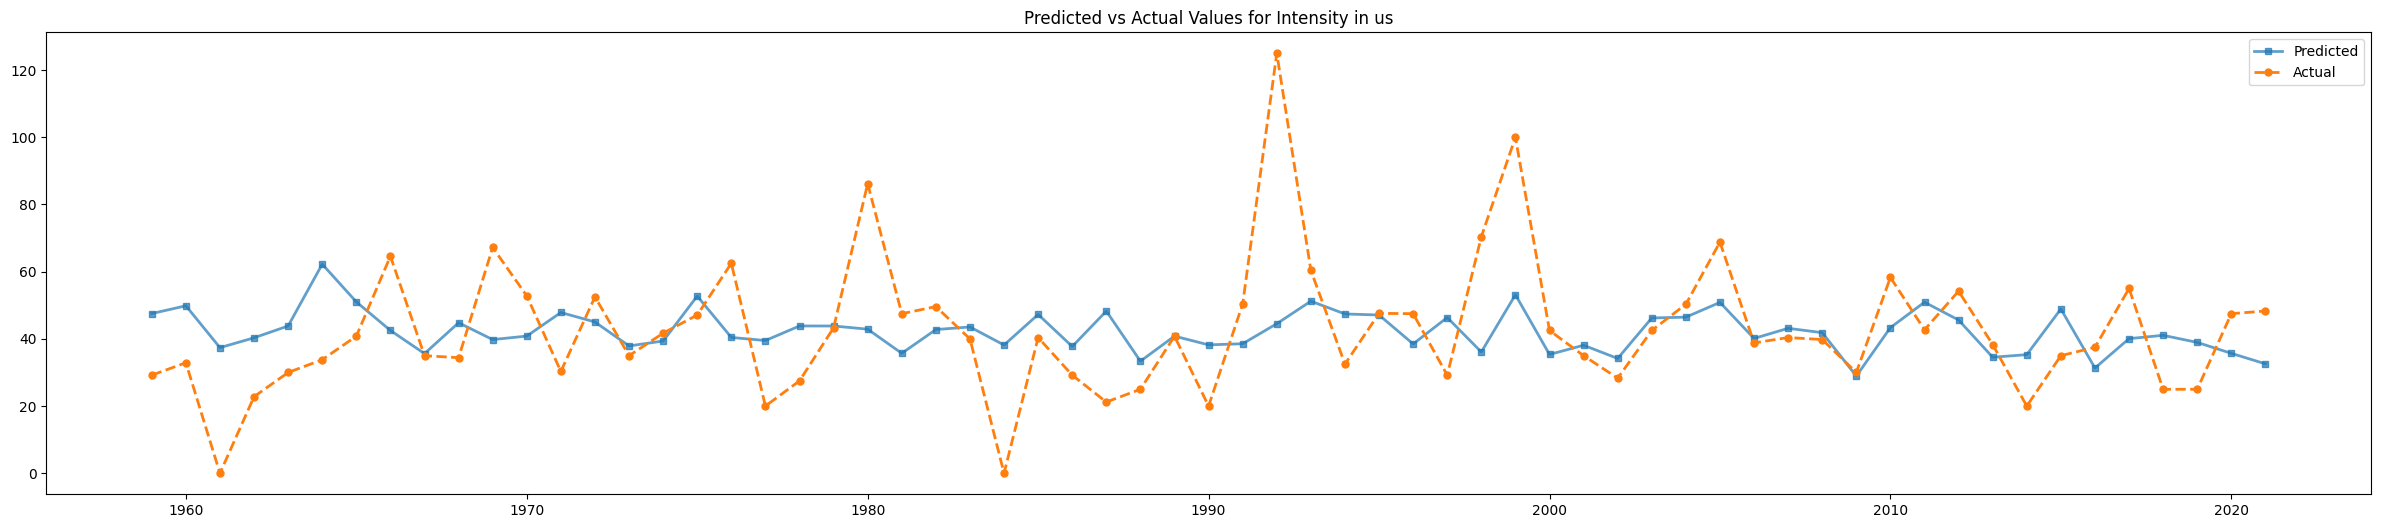

In [ ]:
# Load the predictions from the CSV file
y2_pred_df = pd.read_csv('y_pred_ANN_inten_20230725_JJA.csv')

# Plot the predictions and actual values for y2 by country and month
countries = y2_pred_df['country'].unique()

for country in countries:
    country_pred_df = y2_pred_df[y2_pred_df['country'] == country]
    country_pred_df = country_pred_df.groupby('year').agg({'y2_actual': 'mean', 'y2_pred': 'mean'}).reset_index()
    rmse_1 = np.sqrt(mean_squared_error(country_pred_df['y2_actual'], country_pred_df['y2_pred']))
    print("RMSE for y2:", rmse_1)
    corr = country_pred_df['y2_actual'].corr(country_pred_df['y2_pred'])
    print("Correlation for y2:", corr)
    plt.figure(figsize=(30, 6))
    plt.plot(country_pred_df['year'], country_pred_df['y2_pred'], label="Predicted", linewidth=2, linestyle='-', marker='s', markersize=5, alpha=0.7)
    plt.plot(country_pred_df['year'], country_pred_df['y2_actual'], label="Actual", linewidth=2, linestyle='--', marker='o', markersize=5, alpha=1)
    plt.title(f"Predicted vs Actual Values for Intensity in {country}")
    plt.legend()
    plt.show()
